# Problema das N-Rainhas
<p>Posicionar N rainhas em um tabuleiro NxN de tal forma que elas não se ataquem </p>
<p>Versão: 1.0</p>
<p>Data: 17.04.2025</p>

In [1]:
# Importar bibliotecas necessárias

import matplotlib.pyplot as plt
import math
import random
import copy


### Funções Auxiliares

In [2]:
# Representar e gerar tabuleiro
def geraTabulerio(tamanho):
  if tamanho < 4 : return [-1] # tabuleiro deve ter no minimo 2 casas
  tabuleiro = [] # gera o tabuleiro
  for i in range(tamanho): # para cada linha do tabuleiro
    tabuleiro.append([]) # adiciona uma linha vazia
    for j in range(tamanho): # para cada coluno dessa linha
      tabuleiro[i].append(0) # adiciona o valor 0
  for i in range(tamanho): # para cada linha to tabuleiro
    tabuleiro[i][0] = 1 # colocar o valor 1 na coluna 0
  return tabuleiro # retorna o tabuleiro

In [3]:
print(geraTabulerio(6))

[[1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0]]


In [4]:
# Função para printar o tabuleiro de forma mais harmonica
def printTabuleiro(tab):
  for i in range(len(tab)):
    print(tab[i])

In [5]:
printTabuleiro(geraTabulerio(4))

[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]


In [6]:
# Localizar Rainhas no tabuleiro
def locateQueens(estado):
  q = [] # vetor com as posições das rainhas
  for i in range(len(estado)): # verifica cada linha
    for j in range(len(estado)): # verifica cada coluna
      if estado[i][j] == 1 : q.append((i,j)) # se a casa tiver o
                                             # o valor 1, adiciona
                                             # a posição i,j no vetor
  return q # retorna o vertor com as posições das rainhas

In [7]:
print(locateQueens(geraTabulerio(4)))

[(0, 0), (1, 0), (2, 0), (3, 0)]


In [8]:
# Verificar quanto ataques existem no tabulerios
def calAtaques(estado):
  at = 0 # inicia a contagem com 0 ataques
  atlinhas = 0 # inicia a verificação de ataques em linhas
  # ataques em linhas
  for i in estado: # para cada linha no tabuleiro
    if sum(i)>1: # verifica se a soma da linha é maior que 1
      atlinhas += sum(i)-1 # se for adiciona o valor da soma a atlinhas
  at += atlinhas # adiciona o valor de atlinhas a at

  # ataques em colunas
  atcolunas = 0 # inicia a verificação de ataques em colunas
  for c in range(len(estado)):
    nl = 0
    for l in range(len(estado)): nl += estado[l][c]
    if nl>1: atcolunas += nl - 1
  at += atcolunas # adiciona o valor de atcolunas a at

  # ataques nas diagonais
  pr = locateQueens(estado)
  d = 0
  for p, coords in enumerate(pr):
    i,j = coords
    # diagonal esquerda
    k,w = i+1, j-1
    while (w>=0 and k<len(estado)):
      if estado[k][w] == 1:
        d+=1
        break
      w-=1
      k+=1
    # diagonal direita
    l,c = i+1, j+1
    while(l< len(estado) and c<len(estado)):
      if estado[l][c] == 1:
        d+=1
        break
      l+=1
      c+=1
  at += d
  return at



In [9]:
print(calAtaques(geraTabulerio(5)))

4


In [10]:
# mover uma rainha aleatoria
def moveRainhaAleatoria(estado, casa):
  tam=len(estado)
  while True:
    i,j = random.choice(locateQueens(estado))
    k = (j+casa)%tam
    if estado[i][k] == 0:
      estado[i][k], estado[i][j] = estado[i][j], estado[i][k]
      break
  return estado

In [11]:
printTabuleiro(moveRainhaAleatoria(geraTabulerio(4),2))

[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[0, 0, 1, 0]


In [12]:
# Função para gerar gráfico do desempenho

def graficoAtaques(ataques):
  x = range(len(ataques))
  plt.plot(x, ataques)
  plt.xlabel("iterações")
  plt.ylabel("Ataques Evitados")
  plt.title("Evolução dos ataques")
  #plt.legend(loc="best")
  plt.show()

### Busca Cega
<p>Busca em Profundidade</p>

In [13]:
# função para busca em profundidade
def buscaProfundidade(estado, casa, max):
  n = len(estado[0])
  ataques = []
  i = 0
  # calular máximo de ataques no tabuleiro
  maxAtaques = math.factorial(n)/(2*math.factorial(n-2))

  while i <= max:
    atq = calAtaques(estado)
    ataques.append(maxAtaques - atq)
    if atq == 0:
      print("Sucesso!")
      tab = estado
      return ataques, tab
    estado = moveRainhaAleatoria(copy.deepcopy(estado), casa)
    i += 1
  print("Falha!")
  tab = estado
  return ataques, tab

Sucesso!
[0, 1, 0, 0]
[0, 0, 0, 1]
[1, 0, 0, 0]
[0, 0, 1, 0]


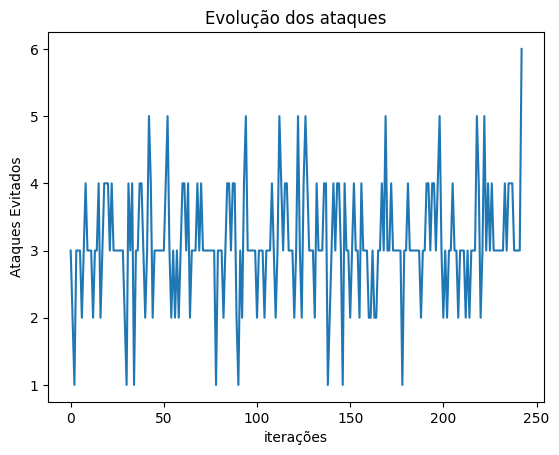

In [17]:
# Testando a busca em profundidade
ataque, tab = buscaProfundidade(geraTabulerio(4), 1, 1000)
printTabuleiro(tab)
graficoAtaques(ataque)


## Buscas Informadas / Heurísticas

<p>Busca Hill Climbing</p>

In [19]:
# Algoritmo Busca Hill Climbing
def hillClimbing(estado, passo, max):
  c=0
  n=len(estado[0])
  maxAtaques = math.factorial(n)/(2*math.factorial(n-2))
  ataques = []
  change = True
  while c <= max:
    change = False
    atq = calAtaques(estado)
    ataques.append(maxAtaques - atq)
    if atq == 0:
      return "Solução", estado, atq, ataques
    suc = moveRainhaAleatoria(copy.deepcopy(estado), passo)
    if calAtaques(suc) <= atq:
      estado = suc
      change = True
    if not change: c += 1
  return "Falha", estado, atq, ataques


Busca executada com  Falha
ultimo estado analisado
[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 0, 1]
[0, 0, 1, 0]


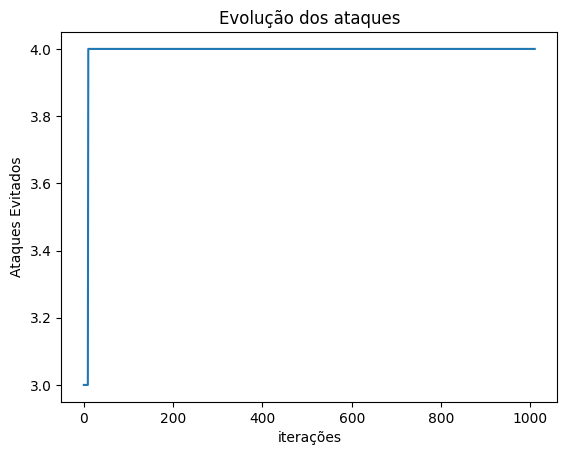

In [31]:
# Colocar o Hill Climbing para funcionar
m,e,a,y = hillClimbing(geraTabulerio(4), 1, 1000)
print("Busca executada com ", m)
print("ultimo estado analisado")
printTabuleiro(e)
graficoAtaques(y)

<p>Como resolver esse problema?</p>